In [2]:
import matplotlib.pyplot as plt
import json, numpy as np
from pathlib import Path

figpath = Path("/Users/yangjunjie/Downloads")

import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['font.family'] = 'serif'

data_kmp2 = None
with open('../data/diamond-dzvp-kmp2.json', 'r') as f:
    data_kmp2 = json.load(f)

data_klno = None
with open('../data/diamond-dzvp-klno.json', 'r') as f:
    data_klno = json.load(f)

for k, v in data_klno.items():
    print(k, v)
    break

for k, v in data_klno.items():
    print(k, v)
    break


../benchmark/diamond/gth-dzvp/3-4-4/rsdf-2.0/klno-1e-7 {'method': 'rsdf-2.0', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 168.0, 'lno_thresh': 1e-07, 'nkpt': 48.0, 'kmesh': '[3, 4, 4]', 'ene_krhf': -11.0043076, 'ene_klno_mp2': -11.21024927, 'ene_klno_ccsd': -11.22564941, 'ene_corr_klno_mp2': -0.20594167, 'ene_corr_klno_ccsd': -0.22134182, 'time_build_df': 57.24, 'time_get_vk': 33.34, 'time_klno': 604.02}
../benchmark/diamond/gth-dzvp/3-4-4/rsdf-2.0/klno-1e-7 {'method': 'rsdf-2.0', 'basis': 'gth-dzvp', 'nao': 26.0, 'natm': 2.0, 'naux': 168.0, 'lno_thresh': 1e-07, 'nkpt': 48.0, 'kmesh': '[3, 4, 4]', 'ene_krhf': -11.0043076, 'ene_klno_mp2': -11.21024927, 'ene_klno_ccsd': -11.22564941, 'ene_corr_klno_mp2': -0.20594167, 'ene_corr_klno_ccsd': -0.22134182, 'time_build_df': 57.24, 'time_get_vk': 33.34, 'time_klno': 604.02}


ene_corr_ccsd_ref =  -0.24737370
ene_corr_ccsd_sol =  -0.24861857
error = -1.2449e-03
ene_corr_mp2_ref =  -0.23515546
ene_corr_mp2_sol =  -0.23515546
error =  0.0000e+00


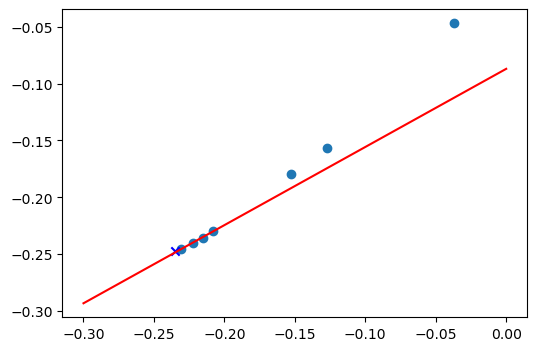

In [3]:
kmesh = "[2, 2, 2]"
basis = "gth-dzvp"
method = ["rsdf-2.0", "fftisdf-100-10"]

# E(LNOMP2) = -87.7378385257895  E_corr = -0.0367366243935613
# E(LNOMP2) = -87.8279332136916  E_corr = -0.126831312295744
# E(LNOMP2) = -87.8537026024166  E_corr = -0.152600701020965
# E(LNOMP2) = -87.909238452674  E_corr = -0.2081365512784
# E(LNOMP2) = -87.9164678254166  E_corr = -0.215365924020655
# E(LNOMP2) = -87.9236496379188  E_corr = -0.222547736522923
# E(LNOMP2) = -87.9317963547432  E_corr = -0.2306944533473173

# E(LNOCCSD) = -87.7480491571775  E_corr = -0.0469472557816444
# E(LNOCCSD) = -87.8576173000321  E_corr = -0.156515398636295
# E(LNOCCSD) = -87.881018302682  E_corr = -0.179916401286346
# E(LNOCCSD) = -87.9308142062206  E_corr = -0.229712304824915
# E(LNOCCSD) = -87.9364630689817  E_corr = -0.235361167585793
# E(LNOCCSD) = -87.9413436555544  E_corr = -0.240241754158516
# E(LNOCCSD) = -87.9463606212951  E_corr = -0.2452587198991996

# 519:ene_corr_kmp2 =  -0.23515546
# 514:ene_kccsd_corr =  -0.24737370

x = [-0.0367366243935613, -0.126831312295744, -0.152600701020965, -0.2081365512784, -0.215365924020655, -0.222547736522923, -0.2306944533473173]
y = [-0.0469472557816444, -0.156515398636295, -0.179916401286346, -0.229712304824915, -0.235361167585793, -0.240241754158516, -0.2452587198991996]

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x0 = None
for k, v in data_kmp2.items():
    is_match = True
    is_match = is_match and (v['kmesh'] == kmesh)
    is_match = is_match and (v['basis'] == basis)
    is_match = is_match and (v['method'] == method[1])

    if is_match:
        x0 = v['ene_corr_kmp2']

x = np.array(x) # [:4]
# x.sort()
y = np.array(y) # [:4]
# y.sort()
ax.scatter(x, y)

xx = np.linspace(-0.30, 0.0, 31)
ix = [3, 4, 5, 6]
a, b = np.polyfit(x[ix], y[ix], 1)
yy = a * xx + b
ax.plot(xx, yy, color='red')

x_ref = -0.23515546
y_ref = -0.24737370
ax.scatter(x_ref, y_ref, color='blue', marker='x')

x_sol = x_ref
y_sol = a * x_ref + b

print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y_sol)
print("error = % 6.4e" % (y_sol - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x_sol)
print("error = % 6.4e" % (x_ref - x_sol))

plt.show()
        


1.6225438612483716 1.3020731797642224 -0.2446758742369365 5.992879279401002e-06


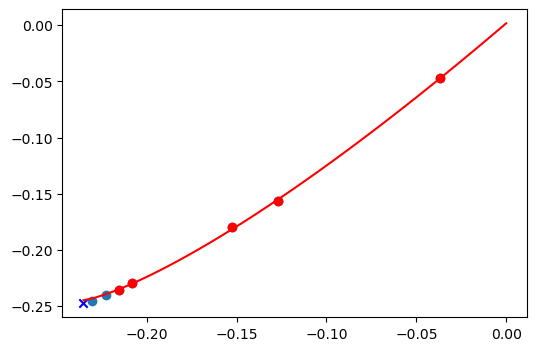

ene_corr_ccsd_ref =  -0.24737370
ene_corr_ccsd_sol =  -0.24467587
error =  2.6978e-03
ene_corr_mp2_ref =  -0.23515546
ene_corr_mp2_sol =  -0.23515546
error =  0.0000e+00


In [4]:
ix = [0, 1, 2, 3, 4]

def f(inp):
    a, b, y0 = inp
    dx = abs(x[ix] - x_ref)
    dy = y0 + a * dx ** b - y[ix]
    return np.sum(dy ** 2)

from scipy.optimize import minimize
res = minimize(f, x0=[1.0, 1.0, y_ref])
a, b, y0 = res.x
print(a, b, y0, res.fun)

xx = np.linspace(x_ref, 0.0, 41)
yy = y0 + a * (xx - x_ref) ** b

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xx, yy, color='red')
ax.scatter(x, y)
ax.scatter(x[ix], y[ix], color='red')
ax.scatter(x_ref, y_ref, color='blue', marker='x')

plt.show()

y_sol = y0
print("ene_corr_ccsd_ref = % 12.8f" % y_ref)
print("ene_corr_ccsd_sol = % 12.8f" % y_sol)
print("error = % 6.4e" % (y_sol - y_ref))

print("ene_corr_mp2_ref = % 12.8f" % x_ref)
print("ene_corr_mp2_sol = % 12.8f" % x_sol)
print("error = % 6.4e" % (x_ref - x_sol))


thresh 1e-07
nmo_lno 76
nocc_lno 16
nmo 208
nocc 32

thresh 1e-08
nmo_lno 117
nocc_lno 19
nmo 208
nocc 32

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 208
nocc 32

thresh 3e-08
nmo_lno 95
nocc_lno 17
nmo 208
nocc 32

thresh 3e-07
nmo_lno 68
nocc_lno 16
nmo 208
nocc 32
[ 1.52801313 14.51167512 -0.21425486]
[[1.24961873e-01 3.50668781e-01 2.23126775e-04]
 [3.50668781e-01 9.95206568e-01 6.69692894e-04]
 [2.23126775e-04 6.69692894e-04 7.40857828e-07]]


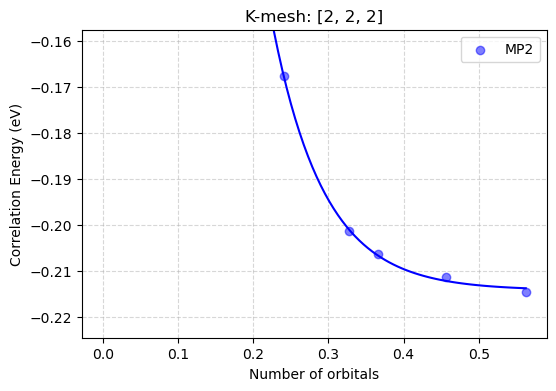


thresh 1e-07
nmo_lno 81
nocc_lno 17
nmo 312
nocc 48

thresh 1e-08
nmo_lno 135
nocc_lno 22
nmo 312
nocc 48

thresh 1e-06
nmo_lno 49
nocc_lno 11
nmo 312
nocc 48

thresh 3e-08
nmo_lno 102
nocc_lno 19
nmo 312
nocc 48

thresh 3e-07
nmo_lno 69
nocc_lno 16
nmo 312
nocc 48
[ 0.99441369 18.29916222 -0.21527204]
[[5.91021049e-02 3.89437326e-01 2.25769245e-04]
 [3.89437326e-01 2.61154887e+00 1.63194794e-03]
 [2.25769245e-04 1.63194794e-03 1.75565261e-06]]


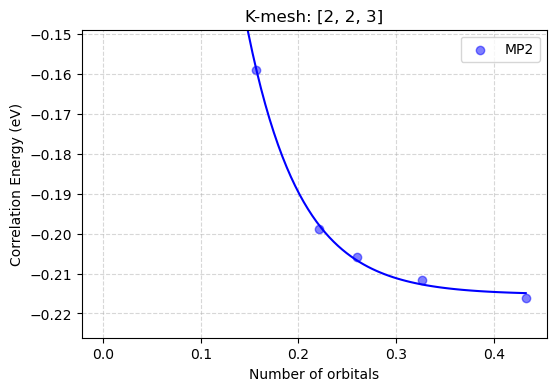


thresh 1e-07
nmo_lno 84
nocc_lno 18
nmo 468
nocc 72

thresh 1e-08
nmo_lno 146
nocc_lno 24
nmo 468
nocc 72

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 468
nocc 72

thresh 3e-08
nmo_lno 108
nocc_lno 21
nmo 468
nocc 72

thresh 3e-07
nmo_lno 69
nocc_lno 16
nmo 468
nocc 72
[ 0.86162906 26.12020808 -0.21419559]
[[8.15068882e-02 9.03392548e-01 3.25487267e-04]
 [9.03392548e-01 1.02111759e+01 4.01732719e-03]
 [3.25487267e-04 4.01732719e-03 2.94501750e-06]]


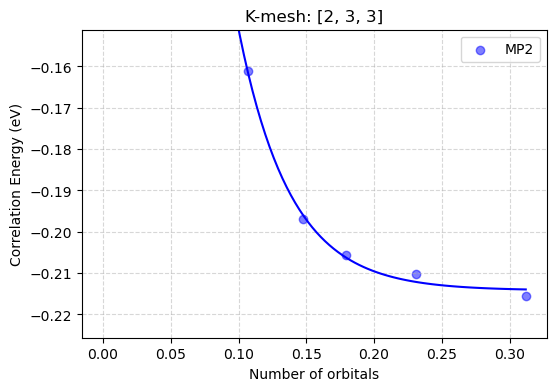


thresh 1e-07
nmo_lno 81
nocc_lno 18
nmo 702
nocc 108

thresh 1e-08
nmo_lno 149
nocc_lno 25
nmo 702
nocc 108

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 702
nocc 108

thresh 3e-08
nmo_lno 108
nocc_lno 19
nmo 702
nocc 108

thresh 3e-07
nmo_lno 68
nocc_lno 16
nmo 702
nocc 108
[ 1.06945409 42.22867099 -0.21245213]
[[2.01686491e-01 2.68761803e+00 5.68735146e-04]
 [2.68761803e+00 3.64563690e+01 8.44128993e-03]
 [5.68735146e-04 8.44128993e-03 3.93002584e-06]]


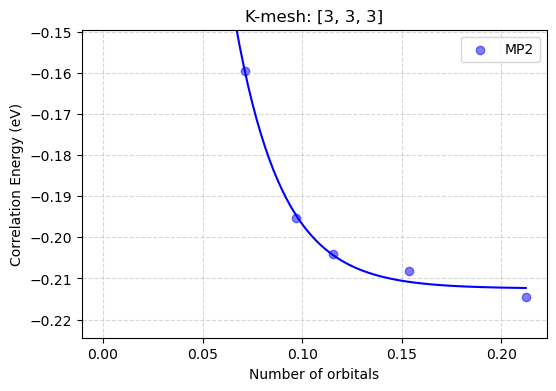


thresh 1e-07
nmo_lno 81
nocc_lno 18
nmo 936
nocc 144

thresh 1e-08
nmo_lno 148
nocc_lno 25
nmo 936
nocc 144

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 936
nocc 144

thresh 3e-08
nmo_lno 110
nocc_lno 20
nmo 936
nocc 144

thresh 3e-07
nmo_lno 69
nocc_lno 16
nmo 936
nocc 144
[ 0.9959295  54.87819294 -0.21381743]
[[1.17869111e-01 2.25156831e+00 3.72533612e-04]
 [2.25156831e+00 4.38300110e+01 7.94923318e-03]
 [3.72533612e-04 7.94923318e-03 2.86458790e-06]]


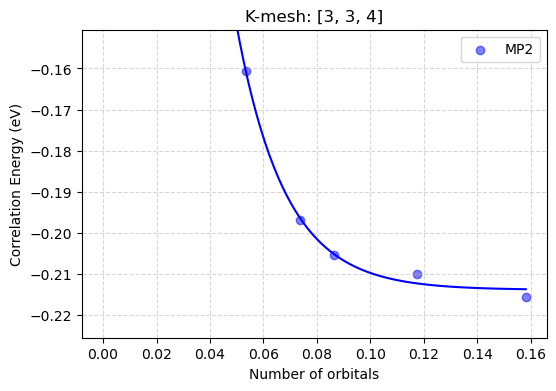


thresh 1e-07
nmo_lno 81
nocc_lno 18
nmo 1248
nocc 192

thresh 1e-08
nmo_lno 149
nocc_lno 26
nmo 1248
nocc 192

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 1248
nocc 192

thresh 3e-08
nmo_lno 111
nocc_lno 21
nmo 1248
nocc 192

thresh 3e-07
nmo_lno 69
nocc_lno 16
nmo 1248
nocc 192
[ 0.97922849 72.68175634 -0.21461271]
[[7.43541691e-02 1.92417856e+00 2.39452786e-04]
 [1.92417856e+00 5.07671337e+01 6.94142784e-03]
 [2.39452786e-04 6.94142784e-03 1.90648421e-06]]


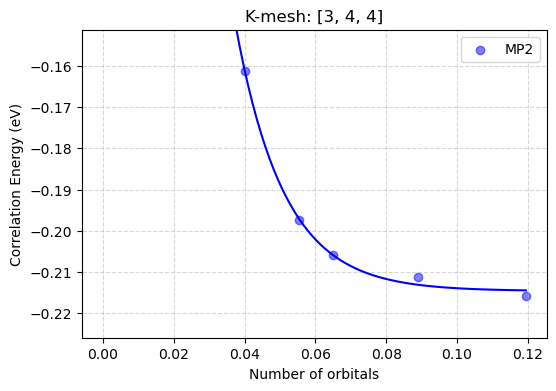


thresh 1e-07
nmo_lno 81
nocc_lno 18
nmo 1664
nocc 256

thresh 1e-08
nmo_lno 146
nocc_lno 25
nmo 1664
nocc 256

thresh 1e-06
nmo_lno 50
nocc_lno 12
nmo 1664
nocc 256

thresh 3e-08
nmo_lno 110
nocc_lno 21
nmo 1664
nocc 256

thresh 3e-07
nmo_lno 68
nocc_lno 16
nmo 1664
nocc 256
[-1.45092288e+02 -5.41212210e-03  1.44936926e+02]
[[ 2.31811277e+12 -8.64422968e+07 -2.31811286e+12]
 [-8.64422968e+07  3.22342847e+03  8.64423003e+07]
 [-2.31811286e+12  8.64423003e+07  2.31811296e+12]]


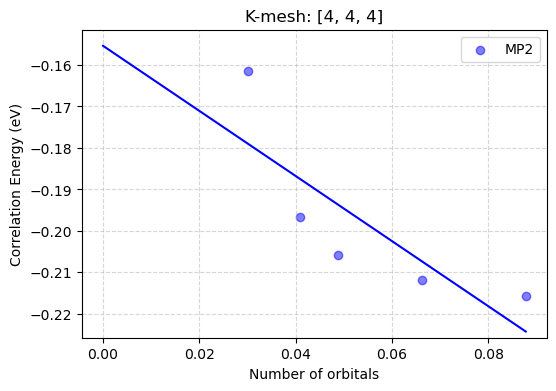

In [75]:
kmesh_list = ["[2, 2, 2]", "[2, 2, 3]", "[2, 3, 3]", "[3, 3, 3]"]
kmesh_list += ["[3, 3, 4]", "[3, 4, 4]", "[4, 4, 4]", "[4, 4, 6]"]
kmesh_list += ["[4, 6, 6]", "[6, 6, 6]", "[6, 6, 8]", "[6, 8, 8]"]
kmesh_list += ["[8, 8, 8]"]

kmesh_list = ["[2, 2, 2]", "[2, 2, 3]", "[2, 3, 3]", "[3, 3, 3]", "[3, 3, 4]", "[3, 4, 4]", "[4, 4, 4]"]



for kmesh in kmesh_list:
    basis = "gth-dzvp"
    method = "fftisdf-100-10"

    data = {}

    for k, v in data_klno.items():
        is_match = True
        is_match = is_match and (v['kmesh'] == kmesh)
        is_match = is_match and (v['basis'] == basis)
        is_match = is_match and (v['method'] == method)
        is_match = is_match and ("klno" in k)

        if is_match:
            # search for nmo in the key path
            import subprocess
            cmd = ["grep", "-r", "nocc =", "../" + k]
            res = subprocess.check_output(cmd).decode("utf-8")
            res = res.split("\n")

            nmo = int(res[0].split()[5])
            nocc = int(res[0].split()[2][:-1])
            
            cmd = ["grep", "-r", "CCSD nocc =", "../" + k]
            res = subprocess.check_output(cmd).decode("utf-8")
            res = res.split("\n")
            nmo_list  = [int(i.split("nmo = ")[-1]) for i in res if "nmo = " in i]
            nocc_list = [int(i.split("nocc = ")[-1].split(",")[0]) for i in res if "nocc = " in i]
            nmo_lno = max(nmo_list)
            nocc_lno = max(nocc_list)

            thresh = float(k.split("klno-")[-1])
            data[thresh] = {
                "ene_corr_klno_mp2": v['ene_corr_klno_mp2'],
                "ene_corr_klno_ccsd": v['ene_corr_klno_ccsd'],
                "nmo_lno": nmo_lno, "nocc_lno": nocc_lno,
                "nmo": nmo, "nocc": nocc,
            }

    for thresh, v in data.items():
        print("\nthresh", thresh)
        print("nmo_lno", v["nmo_lno"])
        print("nocc_lno", v["nocc_lno"])
        print("nmo", v["nmo"])
        print("nocc", v["nocc"])

    thresh_list = list(data.keys())
    thresh_list.sort()

    for k, v in data_klno.items():
        is_match = True
        is_match = is_match and (v['kmesh'] == kmesh)
        is_match = is_match and (v['basis'] == basis)
        is_match = is_match and (v['method'] == method)
        is_match = is_match and ("kmp2" in k)

        if is_match:
            ene_corr_kmp2 = v.get("ene_corr_kmp2", np.nan)
            ene_corr_kccsd = v.get("ene_corr_kccsd", np.nan)
            data["ref"] = {
                "ene_corr_kmp2": ene_corr_kmp2,
                "ene_corr_kccsd": ene_corr_kccsd,
            }

    if not "ref" in data:
        data["ref"] = {
            "ene_corr_kmp2": np.nan,
            "ene_corr_kccsd": np.nan,
        }

    y1 = [data[thresh]['ene_corr_klno_mp2'] for thresh in thresh_list]
    y2 = [data[thresh]['ene_corr_klno_ccsd'] for thresh in thresh_list]
    y1 = np.array(y1)
    y2 = np.array(y2)

    if "ref" in data:
        y1_ref = data["ref"]["ene_corr_kmp2"]
        y2_ref = data["ref"]["ene_corr_kccsd"]
    else:
        y1_ref = np.nan
        y2_ref = np.nan

    noccs = [data[thresh]['nocc_lno'] for thresh in thresh_list]
    nmos = [data[thresh]['nmo_lno'] for thresh in thresh_list]


    fig, ax = plt.subplots(1, 1, figsize=(6, 4))

    xx = np.array(nmos) / data[thresh_list[0]]["nmo"]

    def func(x, a, b, y0):
        return a * np.exp(-b * x) + y0
    
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(func, xx, y1, p0=[1.5, 10.0, -0.2], maxfev=10000)
    print(popt)
    print(pcov)

    a, b = np.polyfit(xx[:-2], y1[:-2], 1)
    ax.scatter(xx, y1, c="blue", alpha=0.5, label="MP2")
    # x = np.linspace(-0.02, 0.02, 100)
    x = np.linspace(0.0, xx.max(), 100)
    ax.plot(x, func(x, *popt), color="blue")
    ax.hlines(y1_ref, 0.0, xx.max(), colors="blue", alpha=0.5, linestyles="dashed")

    # a, b = np.polyfit(xx[:-2], y2[:-2], 1)
    # ax.scatter(xx, y2, c="red", alpha=0.5, label="CCSD")
    # # x = np.linspace(-0.02, 0.02, 100)
    # x = np.linspace(0.0, xx.max(), 100)
    # ax.plot(x, func(x, *popt), color="red")
    # ax.hlines(y2_ref, 0.0, xx.max(), colors="red", alpha=0.5, linestyles="dashed")
    ax.set_ylim(y1.min() - 0.01, y1.max() + 0.01)

    ax.set_xlabel("Number of orbitals")
    ax.set_ylabel("Correlation Energy (eV)")
    ax.set_title(f"K-mesh: {kmesh}")
    ax.grid(
        linestyle="dashed",
        alpha=0.5,
    )
    ax.legend()
    # ax.set_xlim(0.0, 1.0)
    # ax.set_ylim(-0.03, -0.01)
    plt.show()

